# Initial findings in Movies

## I. Movies: general information

### Importing Data

Importing relevant packages:

In [1]:
import re
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_movies = pd.read_csv('../Data/interim/movies/movies.csv')

In [3]:
df_movies.head(2)

Unnamed: 0  adult                              belongs_to_collection    id  \
0           0  False  {'id': 10194, 'name': 'Toy Story Collection', ...   862   
1           1  False                                                NaN  8844   

  original_language                                           overview  \
0                en  Led by Woody, Andy's toys live happily in his ...   
1                en  When siblings Judy and Peter discover an encha...   

   popularity                               production_companies  \
0   21.946943     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1   17.015539  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   

                                production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   

                         ...                          Foreign History Horror  \
0                        ...                              NaN     NaN    NaN   
1                        ...                              NaN     NaN    NaN   

   Music  Mystery  Romance Thriller  War Western  \
0    NaN      NaN      NaN      NaN  NaN     NaN   
1    NaN      NaN      NaN      NaN  NaN     NaN   

                                            key_list  
0  ['jealousy', 'toy', 'boy', 'friendship', 'frie...  
1                       ['disappearance', 'recluse']  

[2 rows x 35 columns]

In [4]:
df_movies.rename(columns={'Unnamed: 0': 'counter'}, inplace=True)

In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43680 entries, 0 to 43679
Data columns (total 35 columns):
counter                  43680 non-null int64
adult                    43680 non-null bool
belongs_to_collection    4458 non-null object
id                       43680 non-null int64
original_language        43670 non-null object
overview                 42956 non-null object
popularity               43676 non-null float64
production_companies     43676 non-null object
production_countries     43676 non-null object
release_date             43650 non-null object
runtime                  43494 non-null float64
spoken_languages         43676 non-null object
title                    43676 non-null object
vote_average             43676 non-null float64
vote_count               43676 non-null float64
bool_Id                  43680 non-null bool
Action                   6703 non-null object
Adventure                3551 non-null object
Animation                1972 non-null object
Come

We have two categories: adults and not adults. How many no adult movies there are in the dataFrame?

In [6]:
a = df_movies.groupby('adult').count()
no_adult = a.loc[0, 'counter']
adult = a.loc[1, 'counter']

print('No adult movies: {}%'.format(100*no_adult/(adult+no_adult)))

No adult movies: 99.9793956043956%


Almost all of them are no adult movies. Which adult movies there are in the list?

In [7]:
df_movies[df_movies['adult'] == True].title

19005    Erotic Nights of the Living Dead
27613                            Standoff
30599                     Electrical Girl
30760                         Diet of Sex
38615          Amateur Porn Star Killer 2
38616                            The Band
39217                    The Sinful Dwarf
39622                          Adulterers
41523                          Half -Life
Name: title, dtype: object

Original languages

In [8]:
df_movies.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'cy', 'vi',
       'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo', 'ca',
       'fi', 'th', 'sk', 'hu', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

### Most popular languages

20 Most popular languages are:

In [9]:
languages = df_movies.groupby('original_language').count().sort_values('counter', ascending=False)[:20]

Using a threshold of 400 movies, the 10 most popular languages in movies are:

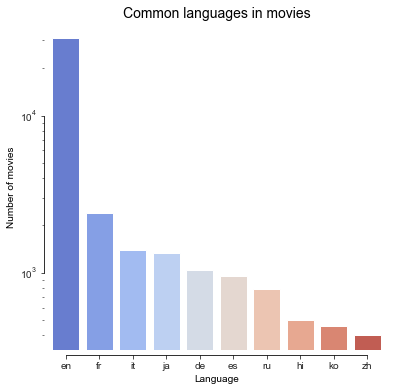

In [10]:
f, ax = plt.subplots(figsize=(6, 6))
_ = sns.set_style("white")
ax = sns.barplot(x=languages[:10].index, y='counter', data=languages[:10], palette='coolwarm')
ax.set_yscale('log')
_ = plt.xlabel('Language', fontsize=10)
_ = plt.ylabel('Number of movies', fontsize=10)
_ = plt.title('Common languages in movies', fontsize=14)
_ = sns.despine(offset=5, trim=True)

English is the most popular language in movies, followed by french, italian, japanese, german, spanish and russian. A little more down are hindi, korean and chinese.

### Vote count

To analyse the vote average per movie we need to know how many votes are deciding these score.

In [11]:
df_movies.vote_count.describe()

count    43676.000000
mean       114.748168
std        501.019853
min          0.000000
25%          4.000000
50%         11.000000
75%         37.000000
max      14075.000000
Name: vote_count, dtype: float64

If we apply **zscore** criteria, the maximum `vote_count` value dramatically decrease:

In [12]:
df_movies.dropna(subset=['vote_count'], inplace=True)
z = np.abs(stats.zscore(df_movies.vote_count))
df_movies_voteCount = df_movies[(z < 3)]
df_movies_voteCount.vote_count.describe()

count    43005.000000
mean        63.896547
std        176.613050
min          0.000000
25%          4.000000
50%         10.000000
75%         34.000000
max       1617.000000
Name: vote_count, dtype: float64

### Release date

Convert `release_date` to datetime:

In [13]:
df_movies.release_date = pd.to_datetime(df_movies.release_date)

Including an extra column called `release_year`:

In [14]:
df_movies['release_year'] = [date.year for date in df_movies.release_date]

### Runtime

In [15]:
df_movies[df_movies.runtime > 15].runtime.describe()

count    41662.000000
mean        99.520546
std         31.341050
min         16.000000
25%         87.000000
50%         96.000000
75%        108.000000
max       1256.000000
Name: runtime, dtype: float64

If we apply **zscore** criteria, the maximum value of `runtime` decrease again:

In [16]:
df_movies.dropna(subset=['runtime'], inplace=True)
z_runtime = np.abs(stats.zscore(df_movies.runtime))
df_movies_runtime = df_movies[(z_runtime < 3)]
df_movies_runtime.runtime.describe()

count    43198.000000
mean        93.939141
std         28.795276
min          0.000000
25%         86.000000
50%         95.000000
75%        107.000000
max        204.000000
Name: runtime, dtype: float64

In [17]:
# statistics outliers class
df_movies[(z_runtime > 3)].runtime.describe()

count     296.000000
mean      315.621622
std       155.127194
min       205.000000
25%       229.750000
50%       260.000000
75%       349.250000
max      1256.000000
Name: runtime, dtype: float64

In this way, we get **movies with a max length of around 200 minutes**.

### Relation runtime of movies and vote rating

Filtering movies with less than 5 votes:

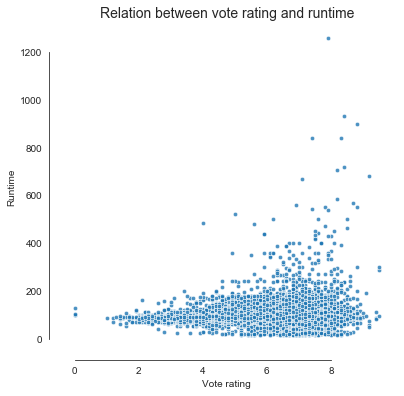

In [18]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(y="runtime", x="vote_average",
                     data=df_movies[(df_movies.vote_count > 4) & (df_movies.runtime > 15)], 
                     s=20, alpha=0.8)
_ = plt.xlabel('Vote rating', fontsize=10)
_ = plt.ylabel('Runtime', fontsize=10)
_ = plt.title('Relation between vote rating and runtime', fontsize=14)
_ = sns.despine(offset=10, trim=True)

Exactly the same, but filtering outliers (it means, the maximum length on movies is around 200 minutes)

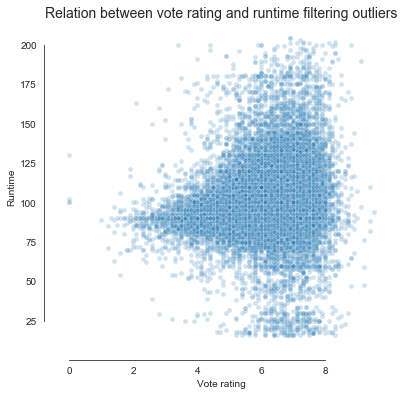

In [19]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(y="runtime", x="vote_average",
                     data=df_movies_runtime[(df_movies_runtime.vote_count > 4) & (df_movies_runtime.runtime > 15)],
                     s=24, alpha=0.2)
_ = plt.xlabel('Vote rating', fontsize=10)
_ = plt.ylabel('Runtime', fontsize=10)
_ = plt.title('Relation between vote rating and runtime filtering outliers', fontsize=14)
_ = sns.despine(offset=10, trim=True)

Therefore, it makes sense split data in classes: regular movies and longer movies, as follows

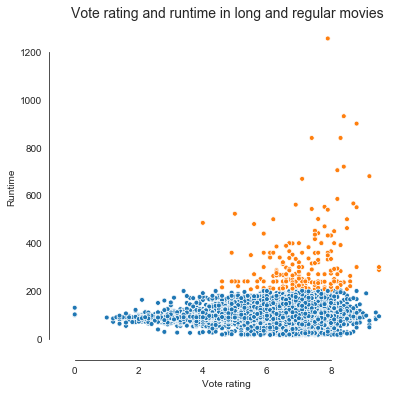

In [20]:
df_movies.dropna(subset=['runtime'], inplace=True)
z_runtime = np.abs(stats.zscore(df_movies.runtime))
df_movies['z_runtime'] = [True if z > 3 else False for z in z_runtime ]

f, ax = plt.subplots(figsize=(6, 6))
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(y="runtime", x="vote_average",
                     data=df_movies[(df_movies.vote_count > 4) & (df_movies.runtime > 15)],
                     hue='z_runtime', s=24)
_ = plt.xlabel('Vote rating', fontsize=10)
_ = plt.ylabel('Runtime', fontsize=10)
_ = plt.title('Vote rating and runtime in long and regular movies', fontsize=14)
_ = sns.despine(offset=10, trim=True)
ax.legend_.remove()

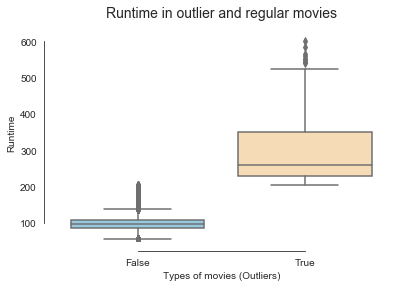

In [21]:
ax = sns.boxplot(y="runtime", x='z_runtime',
            palette=["skyblue", "navajowhite"],
            data=df_movies).set(
            xlabel='Types of movies (Outliers)', 
            ylabel='Runtime')
_ = plt.ylim(50, 650)
_ = plt.title('Runtime in outlier and regular movies', fontsize=14)
sns.despine(offset=10, trim=True)

### 2. How loved or hated are the extensive movies?

In this section we analyse the relation between vote rating (from 0 to 10 scores) and runtime of films. We only consider the movies with more than 4 vote counts and a runtime superior than 15 minutes, that represent three superior quartiles of data. 

The mean of the runtime in movies is around 100 minutes and we can observe some movies that exceed the 400 minutes. The range of runtime is extended as the vote rating increases. In other words, the movies little liked have a runtime range shorter than the rest of movies. But what kind of movies exceed the 400 minutes? The list below is showing as those films, with the vote average included and we'll indicate to following, a lot of them are mini-series. 

In [23]:
df_movies[(df_movies.runtime > 300) & (df_movies.vote_count > 4)].loc[:, ['title','release_date', 'runtime', 'vote_average', 'original_language']].sort_values('runtime', ascending=False).head(10)

title release_date  runtime  \
23399                               Centennial   1978-10-01   1256.0   
13531                    Berlin Alexanderplatz   1980-08-28    931.0   
26838            The Story of Film: An Odyssey   2011-09-03    900.0   
33132              Seventeen Moments in Spring   1973-01-01    840.0   
33073      The Roosevelts: An Intimate History   2014-09-15    840.0   
8942                From the Earth to the Moon   1998-04-05    720.0   
41614                         Band of Brothers   2001-09-09    705.0   
18194                            The Civil War   1990-09-23    680.0   
30113                              I, Claudius   1976-09-20    669.0   
33116  The Untold History of the United States   2012-11-12    585.0   

       vote_average original_language  
23399           7.9                en  
13531           8.4                de  
26838           8.8                en  
33132           7.4                ru  
33073           8.3                en  
8942            8.4                en  
41614           8.2                en  
18194           9.2                en  
30113           7.1                en  
33116           8.2                en

This list has only five movies, with clear historical content and all of them before 1995: Empire, topping the list, is a 1964 black-and-white silent film that consists of eight hours and five minutes of slow motion footage of an unchanging view of the Empire State Building. War and Peace, based on the Leo Tolstoy's 1869 novel about the Napoleonic era. Hitler: A Film from Germany is a 1977 Franco-British-German experimental film. Shoah, french movie about the Holocaust. Sátántangó is a Hungarian film based on the novel of the same name, about authoritarianism during the Hungarian People's Republic.

The rest of names on the list are series based on novels or historical context. That's the reason why we decide to include them in the analysis. 

Seventeen Moments of Spring is a 1973 Soviet twelve-part television series; Centennial, Berlin Alexanderplatz is a 14-part West German television miniseries, North and South, Book I, From the Earth to the Moon and The 10th Kingdom. Heimat is a series of films about life in Germany from the 1840s to 2000. Shaka Zulu is a 1986 South African television series is based on the story of the king of the Zulu, Shaka (reigned 1816 to 1828), and the writings of the British traders with whom he interacted. The Civil War is a 1990 American television documentary miniseries about the American Civil War. I, Claudius is a 1976 BBC Television
The Story of Film: An Odyssey is a 2011 British documentary film about the history of film, presented on television in 15 one-hour chapters with a total length of over 900 minutes.

Another interesting thing is that after to 1995 all of films with long runtimes are mini-series.

In [24]:
popular_languages = languages[:10].index.tolist()
popular_languages

['en', 'fr', 'it', 'ja', 'de', 'es', 'ru', 'hi', 'ko', 'zh']

Runtime long the time:

In [25]:
df_movies_sample = df_movies[(df_movies.runtime > 15)]# & (df_movies.runtime < 200)]

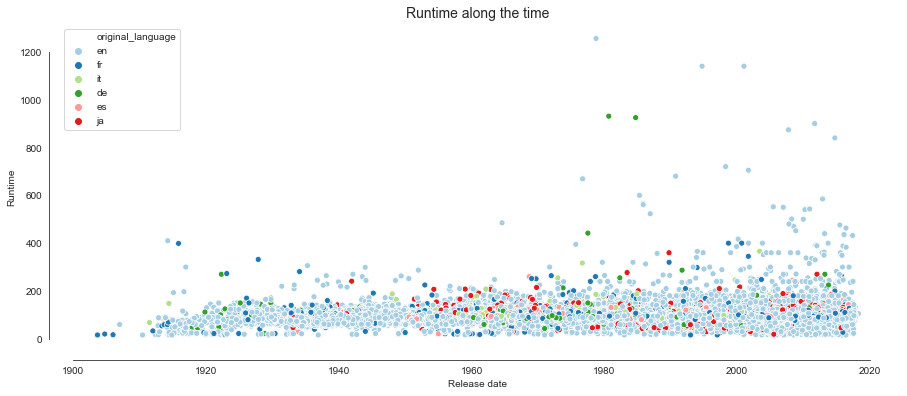

In [26]:
f, ax = plt.subplots(figsize=(15, 6))
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(y="runtime", x="release_date", 
                     hue="original_language",
                     palette='Paired',
                     data=df_movies_sample[
                                    (df_movies_sample.original_language == 'en') |
                                    (df_movies_sample.original_language == 'fr') |
                                    (df_movies_sample.original_language == 'it') |
                                    (df_movies_sample.original_language == 'ja') |
                                    (df_movies_sample.original_language == 'de') |
                                    (df_movies_sample.original_language == 'es')
                                    #(df_movies_sample.original_language == 'ru') |
                                    #(df_movies_sample.original_language == 'hi') |
                                    #(df_movies_sample.original_language == 'ko') |
                                    #(df_movies_sample.original_language == 'zh')
                                    ]     
                    )
_ = plt.xlabel('Release date', fontsize=10)
_ = plt.ylabel('Runtime', fontsize=10)
_ = plt.title('Runtime along the time', fontsize=14)
_ = sns.despine(offset=10, trim=True)

We measure the mean runtime of movies:

In [27]:
df_movies_runtime_time_serie = df_movies_sample.groupby(['release_year']).median().runtime

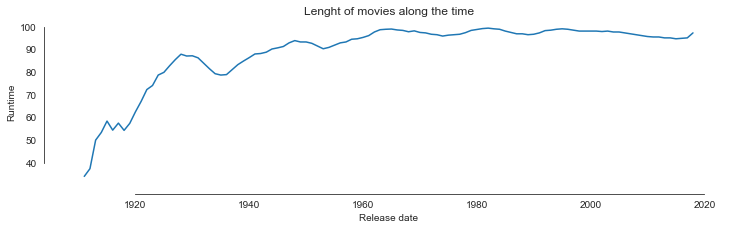

In [28]:
f, ax = plt.subplots(figsize=(12,3))
sns.set_style("white")
_ = sns.lineplot(x=df_movies_runtime_time_serie.index, y=df_movies_runtime_time_serie.rolling(5).mean())
_ = plt.xlabel('Release date', fontsize=10)
_ = plt.ylabel('Runtime', fontsize=10)
_ = plt.title('Lenght of movies along the time', fontsize=12)
_ = sns.despine(offset=10, trim=True)
#df_language_year.loc['en'].counter

Lenght of films have arise along the time.

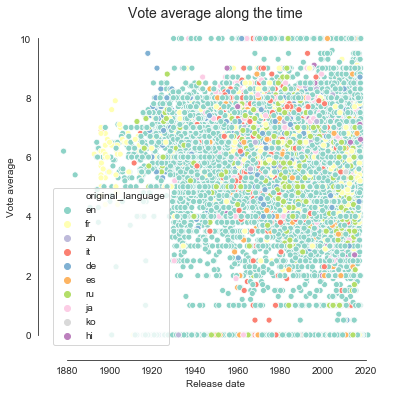

In [29]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(y="vote_average", x="release_date", 
                     hue="original_language",
                     palette='Set3',
                     data=df_movies[(df_movies.original_language == 'en') |
                                    (df_movies.original_language == 'fr') |
                                    (df_movies.original_language == 'it') |
                                    (df_movies.original_language == 'ja') |
                                    (df_movies.original_language == 'de') |
                                    (df_movies.original_language == 'es') |
                                    (df_movies.original_language == 'ru') |
                                    (df_movies.original_language == 'hi') |
                                    (df_movies.original_language == 'ko') |
                                    (df_movies.original_language == 'zh')]     
                    )
_ = plt.xlabel('Release date', fontsize=10)
_ = plt.ylabel('Vote average', fontsize=10)
_ = plt.title('Vote average along the time', fontsize=14)
_ = sns.despine(offset=10, trim=True)

In [30]:
df_movies['release_year'] = [date.year for date in df_movies.release_date]

In [31]:
release_year_serie = df_movies.groupby('release_year').count().counter

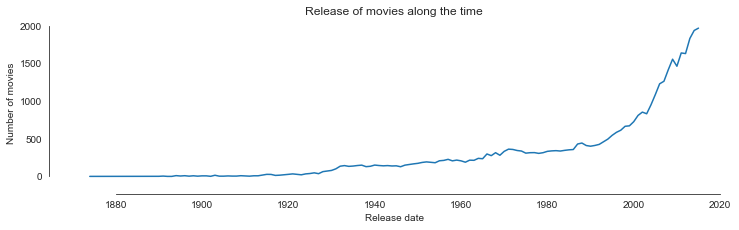

In [32]:
f, ax = plt.subplots(figsize=(12,3))
sns.set_style("white")
_ = sns.lineplot(x=release_year_serie.iloc[:-4].index, y=release_year_serie.iloc[:-4])
_ = plt.xlabel('Release date', fontsize=10)
_ = plt.ylabel('Number of movies', fontsize=10)
_ = plt.title('Release of movies along the time', fontsize=12)
_ = sns.despine(offset=10, trim=True)
#df_language_year.loc['en'].counter

In [33]:
df_movies.head(1)

counter  adult                              belongs_to_collection   id  \
0        0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  862   

  original_language                                           overview  \
0                en  Led by Woody, Andy's toys live happily in his ...   

   popularity                            production_companies  \
0   21.946943  [{'name': 'Pixar Animation Studios', 'id': 3}]   

                                production_countries release_date    ...     \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30    ...      

   Horror Music Mystery  Romance  Thriller  War Western  \
0     NaN   NaN     NaN      NaN       NaN  NaN     NaN   

                                            key_list release_year z_runtime  
0  ['jealousy', 'toy', 'boy', 'friendship', 'frie...       1995.0     False  

[1 rows x 37 columns]

In [34]:
df_language_year = df_movies.groupby(['release_year', 'original_language']).count()
df_language_year = df_language_year[df_language_year.counter > 1]
df_language_year[:-4].sort_values(['release_year', 'original_language'], ascending=False).head(10)

counter  adult  belongs_to_collection  id  \
release_year original_language                                              
2017.0       ru                      13     13                      0  13   
             pt                       3      3                      0   3   
             pl                       2      2                      0   2   
             ko                       5      5                      0   5   
             ja                       3      3                      2   3   
             it                       5      5                      0   5   
             hu                       3      3                      0   3   
             hi                       8      8                      0   8   
             fr                      25     25                      1  25   
             fi                       4      4                      0   4   

                                overview  popularity  production_companies  \
release_year original_language                                               
2017.0       ru                       12          13                    13   
             pt                        3           3                     3   
             pl                        2           2                     2   
             ko                        5           5                     5   
             ja                        3           3                     3   
             it                        4           5                     5   
             hu                        3           3                     3   
             hi                        8           8                     8   
             fr                       24          25                    25   
             fi                        3           4                     4   

                                production_countries  release_date  runtime  \
release_year original_language                                                
2017.0       ru                                   13            13       13   
             pt                                    3             3        3   
             pl                                    2             2        2   
             ko                                    5             5        5   
             ja                                    3             3        3   
             it                                    5             5        5   
             hu                                    3             3        3   
             hi                                    8             8        8   
             fr                                   25            25       25   
             fi                                    4             4        4   

                                  ...      History  Horror  Music  Mystery  \
release_year original_language    ...                                        
2017.0       ru                   ...            1       3      0        2   
             pt                   ...            0       0      0        0   
             pl                   ...            0       0      0        1   
             ko                   ...            0       0      0        0   
             ja                   ...            0       2      0        2   
             it                   ...            0       0      0        0   
             hu                   ...            1       0      0        0   
             hi                   ...            2       0      0        0   
             fr                   ...            0       0      1        0   
             fi                   ...            0       0      0        0   

                                Romance  Thriller  War  Western  key_list  \
release_year original_language                                              
2017.0       ru                       1         2    0        0        13   
             pt                       1         0    

In [35]:
df_language_year = df_movies.groupby(['original_language', 'release_year']).count()

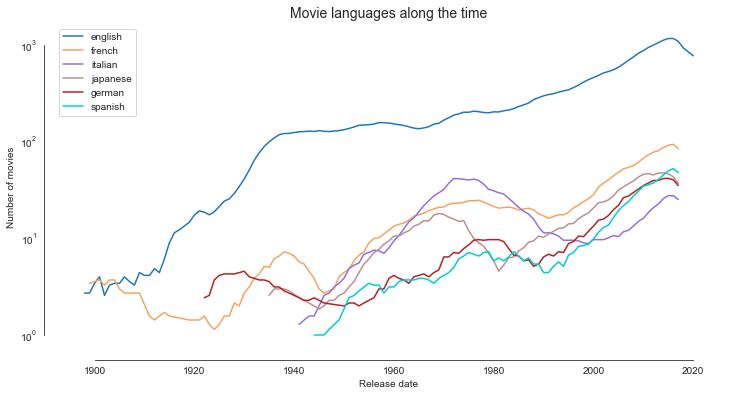

In [36]:
f, ax = plt.subplots(figsize=(12, 6))
sns.set_style("white")
_ = sns.lineplot(x=df_language_year.loc['en'].index, y=df_language_year.loc['en'].counter.rolling(7).mean(), label='english')
_ = sns.lineplot(x=df_language_year.loc['fr'].index, y=df_language_year.loc['fr'].counter.rolling(7).mean(), color='sandybrown', label='french')
_ = sns.lineplot(x=df_language_year.loc['it'].index, y=df_language_year.loc['it'].counter.rolling(7).mean(), color='mediumpurple', label='italian')
_ = sns.lineplot(x=df_language_year.loc['ja'].index, y=df_language_year.loc['ja'].counter.rolling(7).mean(), color='rosybrown', label='japanese')
_ = sns.lineplot(x=df_language_year.loc['de'].index, y=df_language_year.loc['de'].counter.rolling(7).mean(), color='firebrick', label='german')
_ = sns.lineplot(x=df_language_year.loc['es'].index, y=df_language_year.loc['es'].counter.rolling(7).mean(), color='darkturquoise', label='spanish')
_ = plt.legend()
ax.set_yscale('log')
_ = plt.xlabel('Release date', fontsize=10)
_ = plt.ylabel('Number of movies', fontsize=10)
_ = plt.title('Movie languages along the time', fontsize=14)
_ = sns.despine(offset=10, trim=True)
#df_language_year.loc['en'].counter

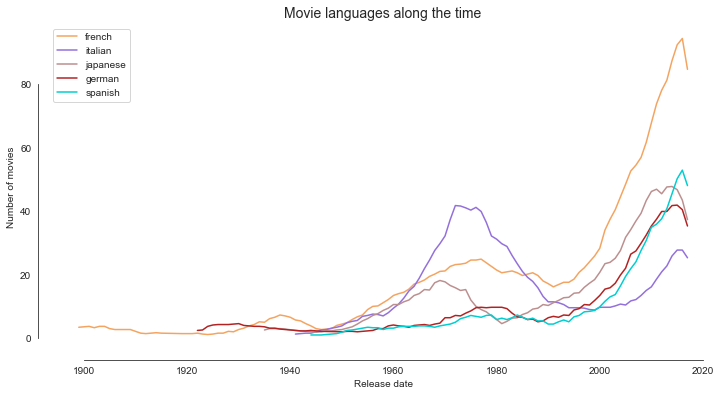

In [37]:
f, ax = plt.subplots(figsize=(12, 6))
sns.set_style("white")
#_ = sns.lineplot(x=df_language_year.loc['en'].index, y=df_language_year.loc['en'].counter.rolling(7).mean(), label='english')
_ = sns.lineplot(x=df_language_year.loc['fr'].index, y=df_language_year.loc['fr'].counter.rolling(7).mean(), color='sandybrown', label='french')
_ = sns.lineplot(x=df_language_year.loc['it'].index, y=df_language_year.loc['it'].counter.rolling(7).mean(), color='mediumpurple', label='italian')
_ = sns.lineplot(x=df_language_year.loc['ja'].index, y=df_language_year.loc['ja'].counter.rolling(7).mean(), color='rosybrown', label='japanese')
_ = sns.lineplot(x=df_language_year.loc['de'].index, y=df_language_year.loc['de'].counter.rolling(7).mean(), color='firebrick', label='german')
_ = sns.lineplot(x=df_language_year.loc['es'].index, y=df_language_year.loc['es'].counter.rolling(7).mean(), color='darkturquoise', label='spanish')
_ = plt.legend()
_ = plt.xlabel('Release date', fontsize=10)
_ = plt.ylabel('Number of movies', fontsize=10)
_ = plt.title('Movie languages along the time', fontsize=14)
_ = sns.despine(offset=10, trim=True)

### Production country

What about the production country? We inspect this column to study the origin country of the movies:

In [38]:
production_countries = []
aux = []
for countries in df_movies['production_countries']:
    elems = re.findall(r"'iso_3166_1': '+[A-Z]+'", countries)
    aux1 = []
    for elem in elems:
        aux1.append(elem[-3:-1])
    aux.append(elem[-3:-1])
    production_countries.append(aux1)
        
df_movies['initials_prod_countries'] = production_countries

List of production countries:

In [39]:
print(np.unique(np.array(aux)))

['AE' 'AF' 'AL' 'AM' 'AO' 'AQ' 'AR' 'AT' 'AU' 'AW' 'AZ' 'BA' 'BB' 'BD'
 'BE' 'BF' 'BG' 'BN' 'BO' 'BR' 'BS' 'BT' 'BW' 'BY' 'CA' 'CD' 'CH' 'CL'
 'CN' 'CO' 'CR' 'CU' 'CY' 'CZ' 'DE' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES'
 'ET' 'FI' 'FR' 'GB' 'GE' 'GH' 'GI' 'GR' 'GT' 'HK' 'HR' 'HU' 'ID' 'IE'
 'IL' 'IN' 'IQ' 'IR' 'IS' 'IT' 'JM' 'JO' 'JP' 'KE' 'KG' 'KH' 'KP' 'KR'
 'KZ' 'LA' 'LB' 'LI' 'LK' 'LR' 'LT' 'LU' 'LV' 'LY' 'MA' 'MC' 'ME' 'MK'
 'ML' 'MO' 'MR' 'MT' 'MX' 'MY' 'NG' 'NL' 'NO' 'NP' 'NZ' 'PA' 'PE' 'PH'
 'PK' 'PL' 'PR' 'PS' 'PT' 'PY' 'QA' 'RO' 'RS' 'RU' 'RW' 'SA' 'SE' 'SG'
 'SI' 'SK' 'SN' 'SU' 'SV' 'SY' 'TD' 'TF' 'TH' 'TJ' 'TN' 'TR' 'TW' 'UA'
 'UG' 'UM' 'US' 'UY' 'UZ' 'VE' 'VN' 'XC' 'XG' 'YU' 'ZA' 'ZW']


In [40]:
lst_col = 'initials_prod_countries'

df_prod_countries = pd.DataFrame({
                                  col:np.repeat(df_movies[col].values, df_movies[lst_col].str.len())
                                  for col in df_movies.columns.drop(lst_col)}
                                ).assign(**{lst_col:np.concatenate(df_movies[lst_col].values)})[df_movies.columns]

In [41]:
df_production_country_year = df_prod_countries.groupby(['initials_prod_countries', 'release_year']).count()
df_production_country_year.sort_values(['initials_prod_countries', 'release_year'], ascending=False).head(10)

counter  adult  belongs_to_collection  \
initials_prod_countries release_year                                          
ZW                      1992.0              1      1                      0   
                        1988.0              1      1                      0   
                        1976.0              1      1                      0   
ZA                      2017.0              4      4                      0   
                        2016.0              3      3                      0   
                        2015.0              4      4                      0   
                        2014.0             12     12                      2   
                        2013.0             11     11                      1   
                        2012.0              6      6                      0   
                        2011.0              9      9                      2   

                                      id  original_language  overview  \
initials_prod_countries release_year                                    
ZW                      1992.0         1                  1         1   
                        1988.0         1                  1         1   
                        1976.0         1                  1         1   
ZA                      2017.0         4                  4         4   
                        2016.0         3                  3         3   
                        2015.0         4                  4         4   
                        2014.0        12                 12        12   
                        2013.0        11                 11        11   
                        2012.0         6                  6         6   
                        2011.0         9                  9         9   

                                      popularity  production_companies  \
initials_prod_countries release_year                                     
ZW                      1992.0                 1                     1   
                        1988.0                 1                     1   
                        1976.0                 1                     1   
ZA                      2017.0                 4                     4   
                        2016.0                 3                     3   
                        2015.0                 4                     4   
                        2014.0                12                    12   
                        2013.0                11                    11   
                        2012.0                 6                     6   
                        2011.0                 9                     9   

                                      production_countries  release_date  \
initials_prod_countries release_year                                       
ZW                      1992.0                           1             1   
                        1988.0                           1             1   
                        1976.0                           1             1   
ZA                      2017.0                           4             4   
                        2016.0                           3             3   
                        2015.0                           4             4   
                        2014.0                          12            12   
                        2013.0                          11            11   
                        2012.0                           6             6   
                        2011.0                           9             9   

                                        ...      History  Horror  Music  \
initials_prod_countries release_year    ...                               
ZW                      1992.0          ...            0       0      0   
                        1988.0          ...            0       0      0   
                        1976.0          ...            0       0      0   
ZA                      2017.0     

In [42]:
df_prod_countries[df_prod_countries['initials_prod_countries'] == 'ES'].head(2)

counter  adult belongs_to_collection     id original_language  \
40        28  False                   NaN    902                fr   
399      312  False                   NaN  12527                es   

                                              overview  popularity  \
40   A scientist in a surrealist society kidnaps ch...    9.822423   
399  Havana, Cuba, 1979. Flamboyantly gay artist Di...    1.777197   

                                  production_companies  \
40   [{'name': 'Procirep', 'id': 311}, {'name': 'Co...   
399  [{'name': 'Miramax Films', 'id': 14}, {'name':...   

                                  production_countries release_date  \
40   [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...   1995-05-16   
399  [{'iso_3166_1': 'CU', 'name': 'Cuba'}, {'iso_3...   1993-01-01   

              ...            Music Mystery Romance  Thriller  War  Western  \
40            ...              NaN     NaN     NaN       NaN  NaN      NaN   
399           ...              NaN     NaN     NaN       NaN  NaN      NaN   

                                              key_list release_year z_runtime  \
40   ['clone', 'dream', 'island', 'eye', 'dystopia'...       1995.0     False   
399  ['gay', 'cuba', 'artist', 'havanna', 'homosexu...       1993.0     False   

    initials_prod_countries  
40                       ES  
399                      ES  

[2 rows x 38 columns]

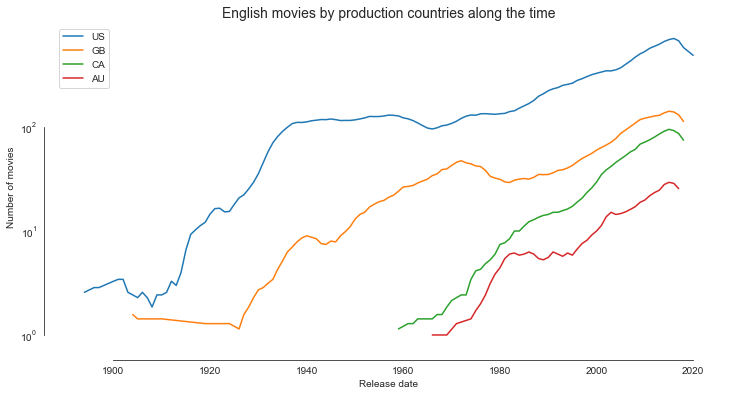

In [43]:
f, ax = plt.subplots(figsize=(12, 6))
sns.set_style("white")
_ = sns.lineplot(x=df_production_country_year.loc['US'].index, y=df_production_country_year.loc['US'].counter.rolling(7).mean(), label='US')
_ = sns.lineplot(x=df_production_country_year.loc['GB'].index, y=df_production_country_year.loc['GB'].counter.rolling(7).mean(), label='GB')
_ = sns.lineplot(x=df_production_country_year.loc['CA'].index, y=df_production_country_year.loc['CA'].counter.rolling(7).mean(), label='CA')
_ = sns.lineplot(x=df_production_country_year.loc['AU'].index, y=df_production_country_year.loc['AU'].counter.rolling(7).mean(), label='AU')
_ = plt.legend()
ax.set_yscale('log')
_ = plt.xlabel('Release date', fontsize=10)
_ = plt.ylabel('Number of movies', fontsize=10)
_ = plt.title('English movies by production countries along the time', fontsize=14)
_ = sns.despine(offset=10, trim=True)

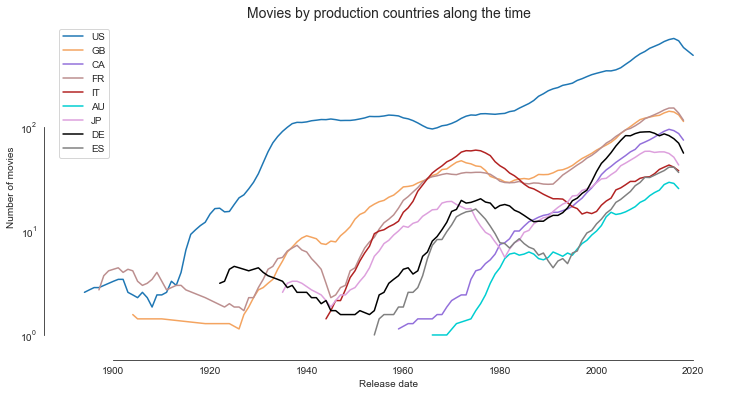

In [44]:
f, ax = plt.subplots(figsize=(12, 6))
sns.set_style("white")
_ = sns.lineplot(x=df_production_country_year.loc['US'].index, y=df_production_country_year.loc['US'].counter.rolling(7).mean(), label='US')
_ = sns.lineplot(x=df_production_country_year.loc['GB'].index, y=df_production_country_year.loc['GB'].counter.rolling(7).mean(), color='sandybrown', label='GB')
_ = sns.lineplot(x=df_production_country_year.loc['CA'].index, y=df_production_country_year.loc['CA'].counter.rolling(7).mean(), color='mediumpurple', label='CA')
_ = sns.lineplot(x=df_production_country_year.loc['FR'].index, y=df_production_country_year.loc['FR'].counter.rolling(7).mean(), color='rosybrown', label='FR')
_ = sns.lineplot(x=df_production_country_year.loc['IT'].index, y=df_production_country_year.loc['IT'].counter.rolling(7).mean(), color='firebrick', label='IT')
_ = sns.lineplot(x=df_production_country_year.loc['AU'].index, y=df_production_country_year.loc['AU'].counter.rolling(7).mean(), color='darkturquoise', label='AU')
_ = sns.lineplot(x=df_production_country_year.loc['JP'].index, y=df_production_country_year.loc['JP'].counter.rolling(7).mean(), color='plum', label='JP')
_ = sns.lineplot(x=df_production_country_year.loc['DE'].index, y=df_production_country_year.loc['DE'].counter.rolling(7).mean(), color='black', label='DE')
_ = sns.lineplot(x=df_production_country_year.loc['ES'].index, y=df_production_country_year.loc['ES'].counter.rolling(7).mean(), color='gray', label='ES')
_ = plt.legend()
ax.set_yscale('log')
_ = plt.xlabel('Release date', fontsize=10)
_ = plt.ylabel('Number of movies', fontsize=10)
_ = plt.title('Movies by production countries along the time', fontsize=14)
_ = sns.despine(offset=10, trim=True)

### Variety of languages in the same movie

In [45]:
spoken_languages = []
for countries in df_movies['spoken_languages']:
    elems = re.findall(r"'iso_639_1': '+[a-z]+'", countries)
    aux = []
    for elem in elems:
        aux.append(elem[-3:-1])
    spoken_languages.append(aux)
        
df_movies['initials_spoken_languages'] = spoken_languages

In [46]:
lst_col = 'initials_spoken_languages'

df_spoken_languages = pd.DataFrame({
                                  col:np.repeat(df_movies[col].values, df_movies[lst_col].str.len())
                                  for col in df_movies.columns.drop(lst_col)}
                                  ).assign(**{lst_col:np.concatenate(df_movies[lst_col].values)})[df_movies.columns]

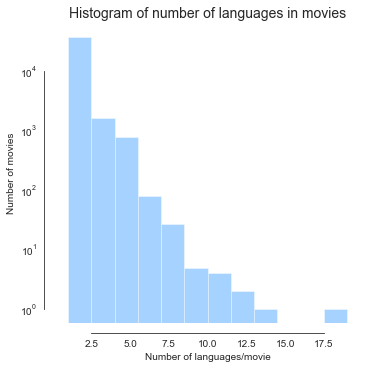

In [47]:
f, ax = plt.subplots(figsize=(5.5, 5.5))
sns.set_style("white")
ax = sns.distplot(np.array(df_spoken_languages.groupby('id').count().counter), bins=12, kde=False, color='dodgerblue')
ax.set_yscale('log')
_ = plt.xlabel('Number of languages/movie', fontsize=10)
_ = plt.ylabel('Number of movies', fontsize=10)
_ = plt.title('Histogram of number of languages in movies', fontsize=14)
_ = sns.despine(offset=10, trim=True)

In [48]:
a = df_spoken_languages.groupby('id').count()
a[a.counter == 19]

df_movies[df_movies.id == 8985].title

21582    Visions of Europe
Name: title, dtype: object

### Analysis of distributions by languages

In this section, statistical tests are apply to determine if distributions of movies split by language have the same population mean. The one-way ANOVA test is used because we try two or more groups of different size. 
We build distributions using the most popular languages:

In [49]:
dist_en = df_language_year.loc['en']
dist_fr = df_language_year.loc['fr']
dist_it = df_language_year.loc['it']
dist_ja = df_language_year.loc['ja']
dist_de = df_language_year.loc['de']
dist_es = df_language_year.loc['es']

A histogram and the respective KDE of English movies are displayed to follow:

/Users/daniela/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


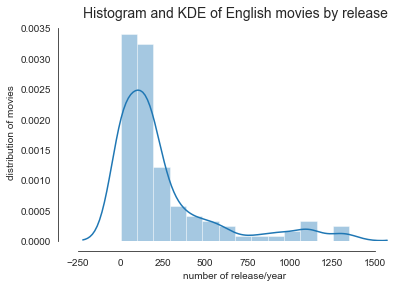

In [50]:
_ = sns.distplot(dist_en.counter, hist=True, norm_hist=True)
_ = plt.xlabel('number of release/year', fontsize=10)
_ = plt.ylabel('distribution of movies', fontsize=10)
_ = plt.title('Histogram and KDE of English movies by release', fontsize=14)
_ = sns.despine(offset=10, trim=True)

In [51]:
dist_en.counter.describe()

count     128.000000
mean      241.164062
std       308.760585
min         1.000000
25%        22.500000
50%       142.500000
75%       272.250000
max      1350.000000
Name: counter, dtype: float64

In [52]:
stats.skew(dist_en.counter)

2.0075560783837103

In [53]:
stats.kurtosis(dist_en.counter)

3.4659195386733765

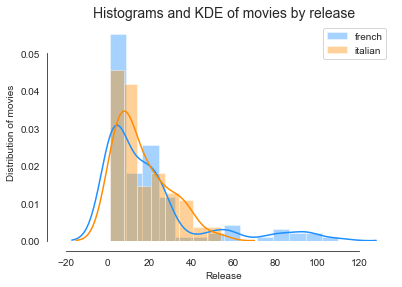

In [54]:
_ = sns.distplot(dist_fr.counter, label='french', norm_hist=True, color='dodgerblue')
_ = sns.distplot(dist_it.counter, label='italian', norm_hist=True, color='darkorange')
_ = plt.legend()
_ = plt.xlabel('Release', fontsize=10)
_ = plt.ylabel('Distribution of movies', fontsize=10)
_ = plt.title('Histograms and KDE of movies by release', fontsize=14)
_ = sns.despine(offset=10, trim=True)

In [55]:
dist_fr.counter.describe()

count    121.000000
mean      19.768595
std       24.438958
min        1.000000
25%        3.000000
50%       14.000000
75%       23.000000
max      110.000000
Name: counter, dtype: float64

In [56]:
dist_it.counter.describe()

count    83.000000
mean     16.204819
std      12.778373
min       1.000000
25%       7.000000
50%      13.000000
75%      23.500000
max      54.000000
Name: counter, dtype: float64

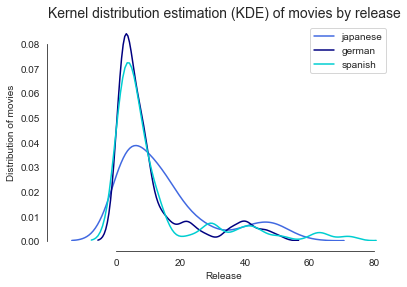

In [57]:
_ = sns.distplot(dist_ja.counter, label='japanese', norm_hist=True, color='royalblue', hist=False)
_ = sns.distplot(dist_de.counter, label='german', norm_hist=True, color='navy', hist=False)
_ = sns.distplot(dist_es.counter, label='spanish', norm_hist=True, color='darkturquoise', hist=False)
_ = plt.legend()
_ = plt.xlabel('Release', fontsize=10)
_ = plt.ylabel('Distribution of movies', fontsize=10)
_ = plt.title('Kernel distribution estimation (KDE) of movies by release', fontsize=14)
_ = sns.despine(offset=10, trim=True)

Statistical test to compare the English distribution with the followed distributions in popularity, french and italian movies:

In [58]:
statistical, pvalue = stats.f_oneway(dist_en.counter, dist_fr.counter, dist_it.counter)
print('H0: English, french and german distributions have the same population mean')
if pvalue >= 0.05:
    print('Fail to reject the null hypothesis with a p-value: {}'.format(pvalue))
else:
    print('Reject the null hypothesis with a p-value: {}'.format(pvalue))

H0: English, french and german distributions have the same population mean
Reject the null hypothesis with a p-value: 1.3931513439177542e-20


As we discuss in time series, release of English movies have had a different and more speed up evolution. But, certainly, there are relationships between the other distributions analyzed.

In [59]:
statistical, pvalue = stats.f_oneway(dist_fr.counter, dist_it.counter)
print('H0: French and german distributions have the same population mean')
if pvalue >= 0.05:
    print('Fail to reject the null hypothesis with a p-value: {}'.format(pvalue))
else:
    print('Reject the null hypothesis with a p-value: {}'.format(pvalue))

H0: French and german distributions have the same population mean
Fail to reject the null hypothesis with a p-value: 0.22444262904829382


And finally, the same test between japanese, spanish and german movies:

In [60]:
statistical, pvalue = stats.f_oneway(dist_ja.counter, dist_de.counter, dist_es.counter)
print('H0: Japanese, german, spanish distributions have the same population mean')
if pvalue >= 0.05:
    print('Fail to reject the null hypothesis with a p-value: {}'.format(pvalue))
else:
    print('Reject the null hypothesis with a p-value: {}'.format(pvalue))

H0: Japanese, german, spanish distributions have the same population mean
Fail to reject the null hypothesis with a p-value: 0.059472478660499976


### Genres analysis

In [61]:
df_movies.head(2)

counter  adult                              belongs_to_collection    id  \
0        0  False  {'id': 10194, 'name': 'Toy Story Collection', ...   862   
1        1  False                                                NaN  8844   

  original_language                                           overview  \
0                en  Led by Woody, Andy's toys live happily in his ...   
1                en  When siblings Judy and Peter discover an encha...   

   popularity                               production_companies  \
0   21.946943     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1   17.015539  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   

                                production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   

             ...             Mystery Romance Thriller  War  Western  \
0            ...                 NaN     NaN      NaN  NaN      NaN   
1            ...                 NaN     NaN      NaN  NaN      NaN   

                                            key_list release_year z_runtime  \
0  ['jealousy', 'toy', 'boy', 'friendship', 'frie...       1995.0     False   
1                       ['disappearance', 'recluse']       1995.0     False   

  initials_prod_countries initials_spoken_languages  
0                    [US]                      [en]  
1                    [US]                  [en, fr]  

[2 rows x 39 columns]

In [62]:
df_movies_genres = df_movies.copy()
for genres in df_movies_genres.loc[:, 'Action':'Western'].columns:
    #df_movies_genres[genres] = df_movies_genres[genres].str.replace(r'[a-zA-Z]+', repl='1')
    df_movies_genres[genres] = df_movies_genres[genres].replace(regex=r'[a-zA-Z]+', value=1.0)

In [63]:
genres_sum = []
for genres in df_movies_genres.loc[:, 'Action':'Western'].columns:
    sum_ = np.sum(df_movies_genres[genres].astype(float))
    genres_sum.append(sum_)

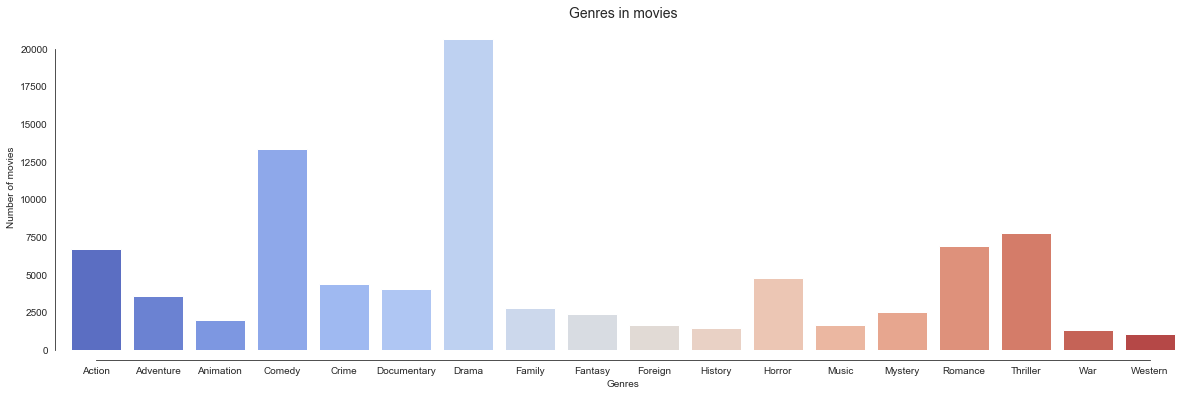

In [64]:
f, ax = plt.subplots(figsize=(20, 6))
_ = sns.set_style("white")
_ = sns.barplot(x=df_movies_genres.loc[:, 'Action':'Western'].columns, y=genres_sum, palette="coolwarm")
_ = plt.xlabel('Genres', fontsize=10)
_ = plt.ylabel('Number of movies', fontsize=10)
_ = plt.title('Genres in movies', fontsize=14)
_ = sns.despine(offset=10, trim=True)
_ = sns.despine(offset=10, trim=True)

### Relation genres, average score, release year

In [65]:
df_movies_genres.head(3)

counter  adult                              belongs_to_collection     id  \
0        0  False  {'id': 10194, 'name': 'Toy Story Collection', ...    862   
1        1  False                                                NaN   8844   
2        2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...  15602   

  original_language                                           overview  \
0                en  Led by Woody, Andy's toys live happily in his ...   
1                en  When siblings Judy and Peter discover an encha...   
2                en  A family wedding reignites the ancient feud be...   

   popularity                               production_companies  \
0   21.946943     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1   17.015539  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2   11.712900  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   

                                production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   

             ...              Mystery Romance Thriller  War  Western  \
0            ...                  NaN     NaN      NaN  NaN      NaN   
1            ...                  NaN     NaN      NaN  NaN      NaN   
2            ...                  NaN     1.0      NaN  NaN      NaN   

                                            key_list  release_year  z_runtime  \
0  ['jealousy', 'toy', 'boy', 'friendship', 'frie...        1995.0      False   
1                       ['disappearance', 'recluse']        1995.0      False   
2                ['fishing', 'duringcreditsstinger']        1995.0      False   

   initials_prod_countries  initials_spoken_languages  
0                     [US]                       [en]  
1                     [US]                   [en, fr]  
2                     [US]                       [en]  

[3 rows x 39 columns]

In [66]:
df_comedy = df_movies_genres[df_movies_genres['Comedy'] == 1][['title', 'vote_average', 'original_language', 'release_year', 'popularity']]
df_comedy.sort_values('popularity', ascending=False).head(5)

title  vote_average  \
29465                                           Minions           6.4   
23656                                        Big Hero 6           7.8   
25634                                          Deadpool           7.4   
25636                    Guardians of the Galaxy Vol. 2           7.6   
25630  Pirates of the Caribbean: Dead Men Tell No Tales           6.6   

      original_language  release_year  popularity  
29465                en        2015.0  547.488298  
23656                en        2014.0  213.849907  
25634                en        2016.0  187.860492  
25636                en        2017.0  185.330992  
25630                en        2017.0  133.827820

In [67]:
df_drama = df_movies_genres[df_movies_genres['Drama'] == 1][['title', 'vote_average', 'original_language', 'release_year', 'popularity']]
df_drama.sort_values('popularity', ascending=False).head(5)


title  vote_average original_language  \
22925                       Gone Girl           7.9                en   
42615  War for the Planet of the Apes           6.7                en   
12271                 The Dark Knight           8.3                en   
528                      Blade Runner           7.9                en   
31922                      The Circle           5.4                en   

       release_year  popularity  
22925        2014.0  154.801009  
42615        2017.0  146.161786  
12271        2008.0  123.167259  
528          1982.0   96.272374  
31922        2017.0   88.439243

In [68]:
df_romance = df_movies_genres[df_movies_genres['Romance'] == 1][['title', 'vote_average', 'original_language', 'release_year', 'popularity']]
df_romance.sort_values('popularity', ascending=False).head(5)

title  vote_average original_language  \
40725         Beauty and the Beast           6.8                en   
42612                The Bad Batch           5.3                en   
346                   Forrest Gump           8.2                en   
38925                   Your Name.           8.5                ja   
10116  Dilwale Dulhania Le Jayenge           9.1                hi   

       release_year  popularity  
40725        2017.0  287.253654  
42612        2017.0   78.807200  
346          1994.0   48.307194  
38925        2016.0   34.461252  
10116        1995.0   34.457024

In [69]:
df_thriller = df_movies_genres[df_movies_genres['Thriller'] == 1][['title', 'vote_average', 'original_language', 'release_year', 'popularity']]
df_thriller.sort_values('popularity', ascending=False).head(5)

title  vote_average original_language  \
23558                              John Wick           7.0                en   
22925                              Gone Girl           7.9                en   
24058  The Hunger Games: Mockingjay - Part 1           6.6                en   
287                             Pulp Fiction           8.3                en   
12271                        The Dark Knight           8.3                en   

       release_year  popularity  
23558        2014.0  183.870374  
22925        2014.0  154.801009  
24058        2014.0  147.098006  
287          1994.0  140.950236  
12271        2008.0  123.167259

In [70]:
df_horror = df_movies_genres[df_movies_genres['Horror'] == 1][['title', 'vote_average', 'original_language', 'release_year', 'popularity']]
df_horror.sort_values('popularity', ascending=False).head(5)

title  vote_average original_language  release_year  \
41355  Alien: Covenant           5.7                en        2017.0   
43446        Wish Upon           5.3                en        2017.0   
38424   47 Meters Down           5.1                en        2017.0   
43285   The Dark Tower           5.7                en        2017.0   
40680          Get Out           7.2                en        2017.0   

       popularity  
41355   72.884078  
43446   59.578823  
38424   52.854103  
43285   50.903593  
40680   36.894806

In [71]:
df_action = df_movies_genres[df_movies_genres['Action'] == 1][['title', 'vote_average', 'original_language', 'release_year', 'popularity']]
df_action.sort_values('popularity', ascending=False).head(5)

title  vote_average original_language  \
31918                    Wonder Woman           7.2                en   
42039                     Baby Driver           7.2                en   
23656                      Big Hero 6           7.8                en   
25634                        Deadpool           7.4                en   
25636  Guardians of the Galaxy Vol. 2           7.6                en   

       release_year  popularity  
31918        2017.0  294.337037  
42039        2017.0  228.032744  
23656        2014.0  213.849907  
25634        2016.0  187.860492  
25636        2017.0  185.330992

### Horror vs Action

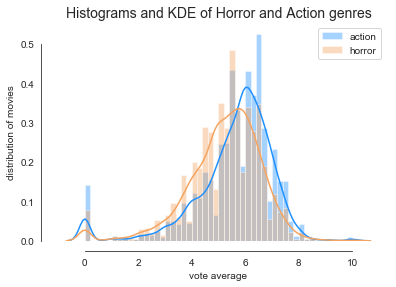

In [72]:
_ = sns.distplot(df_action.vote_average, hist=True, norm_hist=True, color='dodgerblue', label='action')
_ = sns.distplot(df_horror.vote_average, hist=True, norm_hist=True, color='sandybrown', label='horror')
_ = plt.legend()
_ = plt.xlabel('vote average', fontsize=10)
_ = plt.ylabel('distribution of movies', fontsize=10)
_ = plt.title('Histograms and KDE of Horror and Action genres', fontsize=14)
_ = sns.despine(offset=10, trim=True)

In [73]:
statistical, pvalue = stats.levene(df_action.vote_average, df_horror.vote_average)
print('H0: Action and Horror movies are from populations with equal variances')
if pvalue >= 0.05:
    print('Fail to reject the null hypothesis with a p-value: {}'.format(pvalue))
else:
    print('Reject the null hypothesis with a p-value: {}'.format(pvalue))

H0: Action and Horror movies are from populations with equal variances
Fail to reject the null hypothesis with a p-value: 0.26534026620047535


In [74]:
statistical, pvalue = stats.f_oneway(df_action.vote_average, df_horror.vote_average)
print('H0: Action and Horror movies distributions have the same population mean')
if pvalue >= 0.05:
    print('Fail to reject the null hypothesis with a p-value: {}'.format(pvalue))
else:
    print('Reject the null hypothesis with a p-value: {}'.format(pvalue))

H0: Action and Horror movies distributions have the same population mean
Reject the null hypothesis with a p-value: 3.6042227055973535e-38


In [75]:
print('Skew Action: {}'.format(stats.skew(df_action.vote_average)))
print('Kurtosis Action: {}'.format(stats.kurtosis(df_action.vote_average)))
df_action.vote_average.describe()

Skew Action: -1.522357839242903
Kurtosis Action: 3.569969553936012


count    6691.000000
mean        5.588806
std         1.523489
min         0.000000
25%         5.000000
50%         5.900000
75%         6.500000
max        10.000000
Name: vote_average, dtype: float64

In [76]:
print('Skew Horror: {}'.format(stats.skew(df_horror.vote_average)))
print('Kurtosis Horror: {}'.format(stats.kurtosis(df_horror.vote_average)))
df_horror.vote_average.describe()

Skew Horror: -0.9773276975115414
Kurtosis Horror: 2.2664605268142353


count    4744.000000
mean        5.227234
std         1.389468
min         0.000000
25%         4.500000
50%         5.400000
75%         6.100000
max        10.000000
Name: vote_average, dtype: float64

In [77]:
# This is a two-sided test for the null hypothesis that 2 independent 
# samples are drawn from the same continuous distribution.
stats.ks_2samp(df_action.vote_average, df_horror.vote_average)

Ks_2sampResult(statistic=0.17110579689361488, pvalue=2.4181509720253976e-71)

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

**Action and movies distributions have the same variance but not the same mean, therefore (and according to the Kolmogorov-Smirnov statistic on 2 samples, the samples belongs to different distributions**

Action has a higher mean than Horror genre.

If we include war, we get the same conclusion!

### ... and War

In [78]:
df_war = df_movies_genres[df_movies_genres['War'] == 1][['title', 'vote_average', 'original_language', 'release_year', 'popularity']]


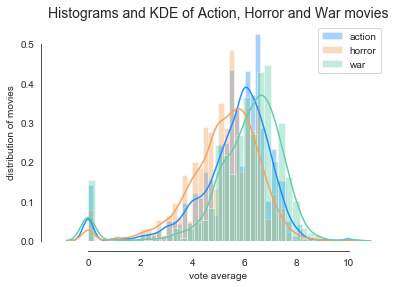

In [79]:
_ = sns.distplot(df_action.vote_average, hist=True, norm_hist=True, color='dodgerblue', label='action')
_ = sns.distplot(df_horror.vote_average, hist=True, norm_hist=True, color='sandybrown', label='horror')
_ = sns.distplot(df_war.vote_average, hist=True, norm_hist=True, color='mediumaquamarine', label='war')
_ = plt.legend()
_ = plt.xlabel('vote average', fontsize=10)
_ = plt.ylabel('distribution of movies', fontsize=10)
_ = plt.title('Histograms and KDE of Action, Horror and War movies', fontsize=14)
_ = sns.despine(offset=10, trim=True)

In [80]:
statistical, pvalue = stats.levene(df_action.vote_average, df_horror.vote_average, df_war.vote_average)
print('H0: Action, Horror and War movies are from populations with equal variances')
if pvalue >= 0.05:
    print('Fail to reject the null hypothesis with a p-value: {}'.format(pvalue))
else:
    print('Reject the null hypothesis with a p-value: {}'.format(pvalue))

H0: Action, Horror and War movies are from populations with equal variances
Fail to reject the null hypothesis with a p-value: 0.33813195739176466


In [81]:
statistical, pvalue = stats.stats.kruskal(df_action.vote_average, df_horror.vote_average, df_war.vote_average)
print('H0: Action, Horror and War movies distributions have the same population mean')
if pvalue >= 0.05:
    print('Fail to reject the null hypothesis with a p-value: {}'.format(pvalue))
else:
    print('Reject the null hypothesis with a p-value: {}'.format(pvalue))

H0: Action, Horror and War movies distributions have the same population mean
Reject the null hypothesis with a p-value: 7.249870226731214e-148


### Romance, Drama and Comedy

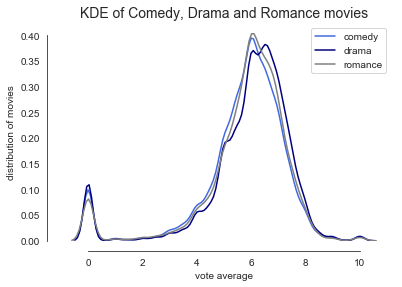

In [82]:
_ = sns.distplot(df_comedy.vote_average, hist=False, norm_hist=True, color='royalblue', label='comedy')
_ = sns.distplot(df_drama.vote_average, hist=False, norm_hist=True, color='navy', label='drama')
_ = sns.distplot(df_romance.vote_average, hist=False, norm_hist=True, color='grey', label='romance')
_ = plt.legend()
_ = plt.xlabel('vote average', fontsize=10)
_ = plt.ylabel('distribution of movies', fontsize=10)
_ = plt.title('KDE of Comedy, Drama and Romance movies', fontsize=14)
_ = sns.despine(offset=10, trim=True)

In [83]:
statistical, pvalue = stats.levene(df_comedy.vote_average, df_drama.vote_average, df_romance.vote_average)
print('H0: Comedy, drama and romance movies are from populations with equal variances')
if pvalue >= 0.05:
    print('Fail to reject the null hypothesis with a p-value: {}'.format(pvalue))
else:
    print('Reject the null hypothesis with a p-value: {}'.format(pvalue))

H0: Comedy, drama and romance movies are from populations with equal variances
Fail to reject the null hypothesis with a p-value: 0.09085408712426002


In [84]:
statistical, pvalue = stats.stats.kruskal(df_drama.vote_average, df_romance.vote_average)
print('H0: Action, Horror and War movies distributions have the same population mean')
if pvalue >= 0.05:
    print('Fail to reject the null hypothesis with a p-value: {}'.format(pvalue))
else:
    print('Reject the null hypothesis with a p-value: {}'.format(pvalue))

H0: Action, Horror and War movies distributions have the same population mean
Reject the null hypothesis with a p-value: 7.584766585165451e-16


### Release by genres

In [85]:
df_drama_year = df_drama.groupby(['release_year']).count()
df_romance_year = df_romance.groupby(['release_year']).count()
df_comedy_year = df_comedy.groupby(['release_year']).count()
df_horror_year = df_horror.groupby(['release_year']).count()
df_thriller_year = df_thriller.groupby(['release_year']).count()
df_action_year = df_action.groupby(['release_year']).count()

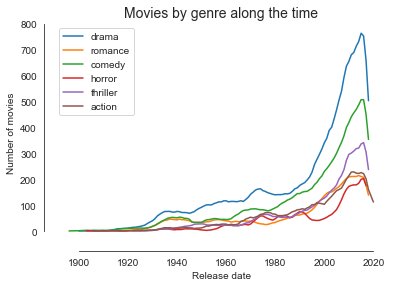

In [86]:
#f, ax = plt.subplots(figsize=(5, 5))
sns.set_style("white")
_ = sns.lineplot(x=df_drama_year.index, y=df_drama_year.title.rolling(5).mean(), label='drama')
_ = sns.lineplot(x=df_romance_year.index, y=df_romance_year.title.rolling(5).mean(), label='romance')
_ = sns.lineplot(x=df_comedy_year.index, y=df_comedy_year.title.rolling(5).mean(), label='comedy')
_ = sns.lineplot(x=df_horror_year.index, y=df_horror_year.title.rolling(5).mean(), label='horror')
_ = sns.lineplot(x=df_thriller_year.index, y=df_thriller_year.title.rolling(5).mean(), label='thriller')
_ = sns.lineplot(x=df_action_year.index, y=df_action_year.title.rolling(5).mean(), label='action')
_ = plt.legend()
#ax.set_yscale('log')
_ = plt.xlabel('Release date', fontsize=10)
_ = plt.ylabel('Number of movies', fontsize=10)
_ = plt.title('Movies by genre along the time', fontsize=14)
_ = sns.despine(offset=10, trim=True)